In [1]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib notebook

In [2]:
X,Y=make_circles(n_samples=500,noise=0.05)

In [3]:
print(X.shape,Y.shape)

(500, 2) (500,)


<IPython.core.display.Javascript object>


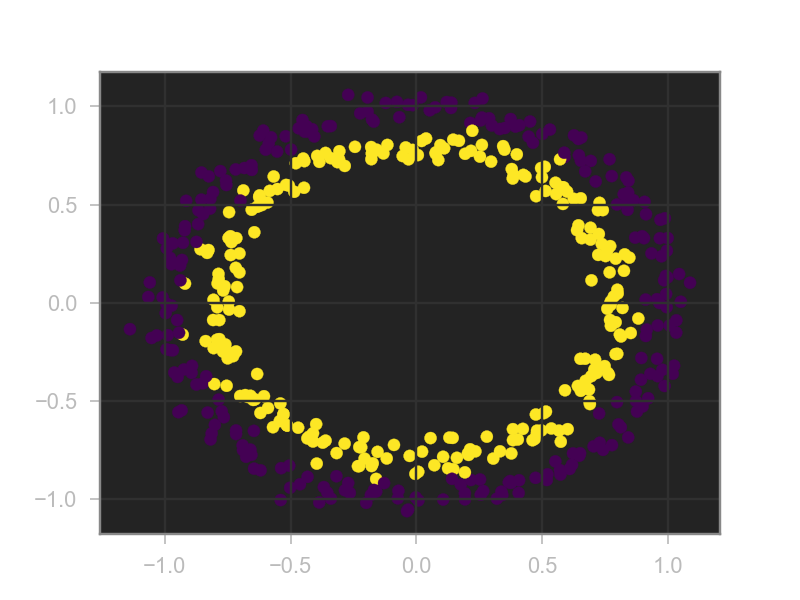

In [4]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

### Converting 2-D to 3-D matrix

In [5]:
def phi(X):
    
    X_1=X[:,0]
    X_2=X[:,1]
    X_3=X_1**2+X_2**2
    
    X_=np.zeros((X.shape[0],3))
    X_[:,:-1]=X
    X_[:,-1]=X_3
    
    return X_

### Another Method To Convert 2D - 3D 

In [ ]:
def custom_kernal(x1,x2):
    return np.square(np.dot(x1,x2.T))

In [6]:
X_=phi(X)

In [7]:
print(X_[:3,:])
print(X_.shape)

[[-0.55206088  0.57936747  0.64043788]
 [-0.9453809  -0.55630428  1.20321949]
 [-0.80544979 -0.23040201  0.70183445]]
(500, 3)


In [8]:
def plot3d(X,show=True):
    fig=plt.figure(figsize=(7,7))
    ax=fig.add_subplot(111,projection='3d')
    x1=X[:,0]
    x2=X[:,1]
    x3=X[:,2]
    
    ax.scatter(x1,x2,x3,zdir='z',c=Y,s=20,depthshade=True)
    if show==True:
        plt.show()
    return ax

<IPython.core.display.Javascript object>


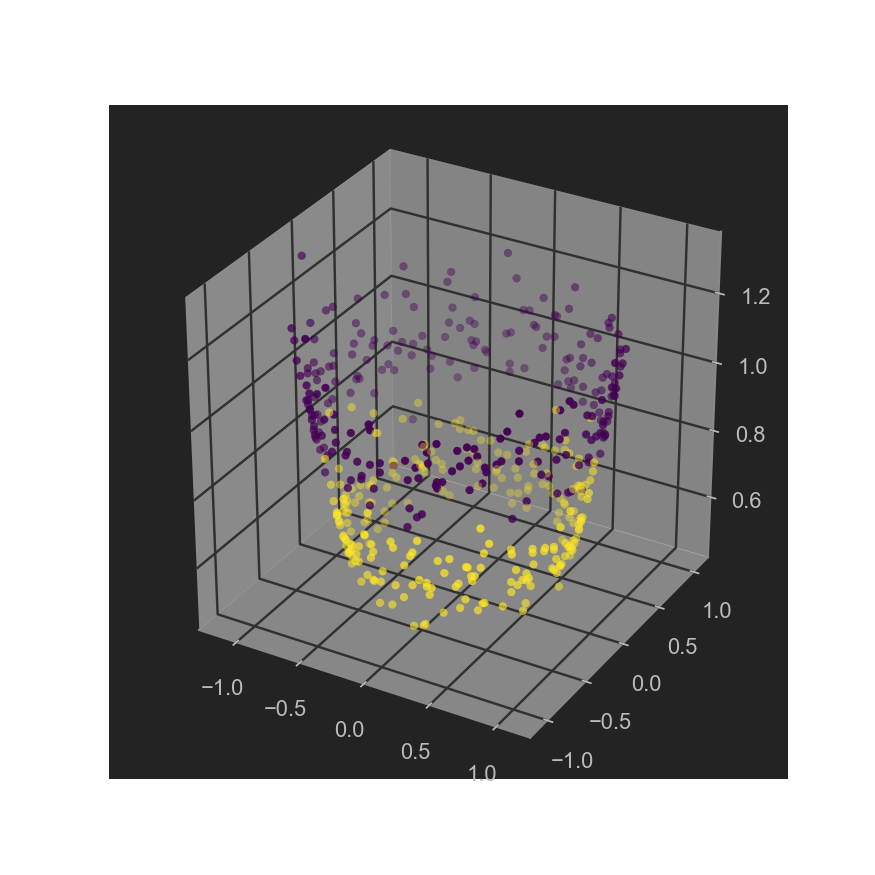

In [9]:
ax=plot3d(X_)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [11]:
lr=LogisticRegression()

In [30]:
acc=cross_val_score(lr,X,Y,cv=5)
print("Accuracy X(2D) : %.2f"%acc.mean())
print(acc)

Accuracy X(2D) : 0.47
[0.52 0.45 0.48 0.46 0.46]


In [13]:
acc=cross_val_score(lr,X_,Y,cv=5).mean()
print("Accuracy X(3D) : %.2f"%acc)

Accuracy X(3D) : 0.98


In [14]:
lr.fit(X_,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
w=lr.coef_

In [16]:
b=lr.intercept_

In [17]:
xx,yy=np.meshgrid(range(-2,2),range(-2,2))
print(xx)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]


In [18]:
z=-(w[0,0]*xx+w[0,1]*yy+b)/w[0,2]
print(z)

[[0.83008782 0.83483021 0.8395726  0.84431499]
 [0.82155099 0.82629337 0.83103576 0.83577815]
 [0.81301415 0.81775654 0.82249893 0.82724131]
 [0.80447731 0.8092197  0.81396209 0.81870448]]


<IPython.core.display.Javascript object>


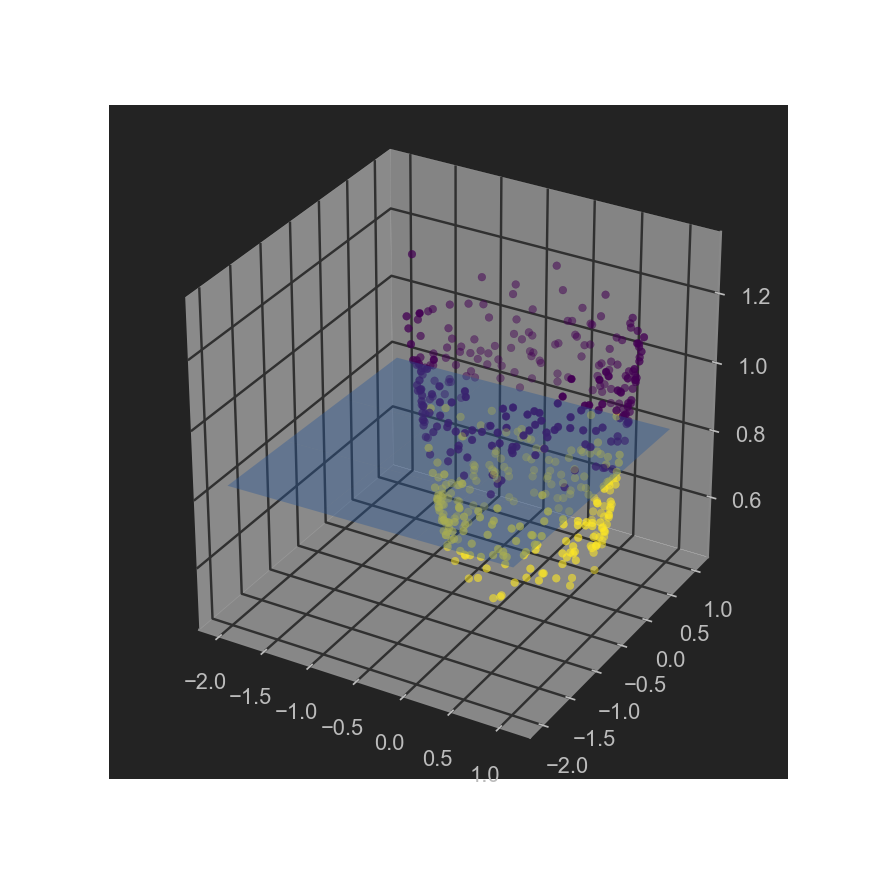

In [19]:
ax=plot3d(X_,False)
ax.plot_surface(xx,yy,z,alpha=0.4)
plt.show()

### Kernal -Trick

In [20]:
from sklearn import svm

- using linear kernal

In [21]:
svc=svm.SVC(kernel='linear')

In [22]:
svc.fit(X,Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
svc.score(X,Y)

0.51

- using rbf kernal

In [24]:
svc=svm.SVC(kernel='rbf')

In [25]:
svc.fit(X,Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
svc.score(X,Y)

0.98